In [1]:
import numpy as np
import matplotlib.pyplot as plt
from d6py import D6Solver

In [2]:
d6 = D6Solver()

In [8]:
d6.FINAL_ENERGY_SCALE = 1e17 # in GeV
print("Initial Energy Scale = ", d6.INITIAL_ENERGY_SCALE)
running_variable_names = ['gp', 'g', 'gs', 'Lambda', 'm2', 'Theta', 'Theta_p', 'Theta_s', 'Gu', 'Gd', 'Ge']

Initial Energy Scale =  91.1876


In [9]:
d6.Initialize_running_variables(running_variable_names)
d6.RUNNING_VARIABLES

{'gp': 0.345367,
 'g': 0.629787,
 'gs': 1.218232,
 'Lambda': 0.257736,
 'm2': 7812.5,
 'Theta': 0.0,
 'Theta_p': 0.0,
 'Theta_s': 0.0,
 'Gu[0,0]': 1.23231e-05,
 'Gu[0,1]': -0.00164215,
 'Gu[0,2]': 0.00590635,
 'Gu[1,0]': 2.84527e-06,
 'Gu[1,1]': 0.00710724,
 'Gu[1,2]': -0.0418547,
 'Gu[2,0]': 4.65426e-08,
 'Gu[2,1]': 0.000308758,
 'Gu[2,2]': 0.994858,
 'Gd[0,0]': 2.70195e-05,
 'Gd[0,1]': 0.0,
 'Gd[0,2]': 0.0,
 'Gd[1,0]': 0.0,
 'Gd[1,1]': 0.000551888,
 'Gd[1,2]': 0.0,
 'Gd[2,0]': 0.0,
 'Gd[2,1]': 0.0,
 'Gd[2,2]': 0.02403012,
 'Ge[0,0]': 2.93766e-06,
 'Ge[0,1]': 0.0,
 'Ge[0,2]': 0.0,
 'Ge[1,0]': 0.0,
 'Ge[1,1]': 0.000607422,
 'Ge[1,2]': 0.0,
 'Ge[2,0]': 0.0,
 'Ge[2,1]': 0.0,
 'Ge[2,2]': 0.0102157}

In [11]:
d6.load_beta_functions()
d6.BETA_EXPRS

{'Beta_gp': 41*gp**3/6,
 'Beta_g': -19*g**3/6,
 'Beta_gs': -7*gs**3,
 'Beta_Lambda': -12*Gd_0_0**2*conjugate(Gd_0_0)**2 - 24*Gd_0_0*Gd_0_1*conjugate(Gd_0_0)*conjugate(Gd_0_1) - 24*Gd_0_0*Gd_0_2*conjugate(Gd_0_0)*conjugate(Gd_0_2) - 24*Gd_0_0*Gd_1_0*conjugate(Gd_0_0)*conjugate(Gd_1_0) - 24*Gd_0_0*Gd_1_1*conjugate(Gd_0_1)*conjugate(Gd_1_0) - 24*Gd_0_0*Gd_1_2*conjugate(Gd_0_2)*conjugate(Gd_1_0) - 24*Gd_0_0*Gd_2_0*conjugate(Gd_0_0)*conjugate(Gd_2_0) - 24*Gd_0_0*Gd_2_1*conjugate(Gd_0_1)*conjugate(Gd_2_0) - 24*Gd_0_0*Gd_2_2*conjugate(Gd_0_2)*conjugate(Gd_2_0) + 12*Gd_0_0*Lambda*conjugate(Gd_0_0) - 12*Gd_0_1**2*conjugate(Gd_0_1)**2 - 24*Gd_0_1*Gd_0_2*conjugate(Gd_0_1)*conjugate(Gd_0_2) - 24*Gd_0_1*Gd_1_0*conjugate(Gd_0_0)*conjugate(Gd_1_1) - 24*Gd_0_1*Gd_1_1*conjugate(Gd_0_1)*conjugate(Gd_1_1) - 24*Gd_0_1*Gd_1_2*conjugate(Gd_0_2)*conjugate(Gd_1_1) - 24*Gd_0_1*Gd_2_0*conjugate(Gd_0_0)*conjugate(Gd_2_1) - 24*Gd_0_1*Gd_2_1*conjugate(Gd_0_1)*conjugate(Gd_2_1) - 24*Gd_0_1*Gd_2_2*conjugate(Gd_0_2)*

In [12]:
d6.Run()

In [13]:
mu = np.linspace(d6.INITIAL_ENERGY_SCALE, d6.FINAL_ENERGY_SCALE)
t = np.log(mu)


In [14]:
def g_analytical(mu):
    b = 19/6
    g_ini = d6.RUNNING_VARIABLES['g']
    mu_ini = d6.INITIAL_ENERGY_SCALE
    a = (8*np.pi**2)/(g_ini**2) - b*np.log(mu_ini)
    return 2*np.sqrt(2)*np.pi/np.sqrt(a + b*np.log(mu))

def gp_analytical(mu):
    b = -41/6
    gp_ini = d6.RUNNING_VARIABLES['gp']
    mu_ini = d6.INITIAL_ENERGY_SCALE
    a = (8*np.pi**2)/(gp_ini**2) - b*np.log(mu_ini)
    return 2*np.sqrt(2)*np.pi/np.sqrt(a + b*np.log(mu))

def gs_analytical(mu):
    b = 7
    gs_ini = d6.RUNNING_VARIABLES['gs']
    mu_ini = d6.INITIAL_ENERGY_SCALE
    a = (8*np.pi**2)/(gs_ini**2) - b*np.log(mu_ini)
    return 2*np.sqrt(2)*np.pi/np.sqrt(a + b*np.log(mu))

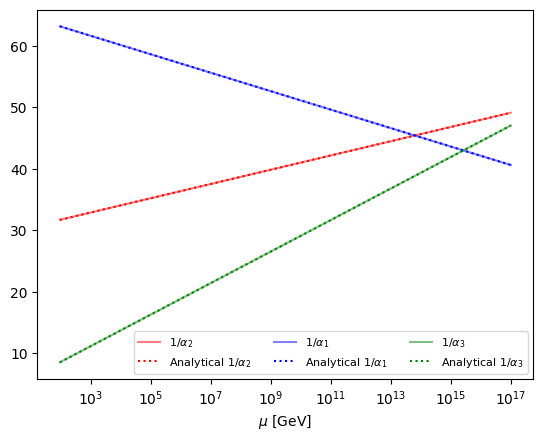

In [15]:
plt.plot(mu, 4*np.pi/d6.Get_values(mu, 'g')**2, label='$1/\\alpha_2$', alpha=0.5, color='red')
plt.plot(mu, 4*np.pi/g_analytical(mu)**2, label='Analytical $1/\\alpha_2$', linestyle="dotted", color='red')
plt.plot(mu, (3/5)*4*np.pi/d6.Get_values(mu, 'gp')**2, label='$1/\\alpha_1$', alpha=0.5, color="blue")
plt.plot(mu, (3/5)*4*np.pi/gp_analytical(mu)**2, label='Analytical $1/\\alpha_1$', linestyle="dotted", color="blue")
plt.plot(mu, 4*np.pi/d6.Get_values(mu, 'gs')**2, label='$1/\\alpha_3$', alpha=0.5, color="green")
plt.plot(mu, 4*np.pi/gs_analytical(mu)**2, label='Analytical $1/\\alpha_3$', linestyle="dotted", color="green")
plt.legend(ncols=3, fontsize=8)
plt.xscale('log')
plt.xlabel('$\\mu$ [GeV]')
plt.show()

In [16]:
print('g = ', d6.Get_values(1e3, 'g'))
print('gp = ', d6.Get_values(1e3, 'gp'))
print('gs = ', d6.Get_values(1e3, 'gs'))
print('Lambda = ', d6.Get_values(1e3, 'Lambda'))
print('m2 = ', d6.Get_values(1e3, 'm2'))
print('Theta = ', d6.Get_values(1e3, 'Theta'))
print('Theta_p = ', d6.Get_values(1e3, 'Theta_p'))
print('Theta_s = ', d6.Get_values(1e3, 'Theta_s'))

g =  [0.61812313]
gp =  [0.34971687]
gs =  [1.06231026]
Lambda =  [0.14970534]
m2 =  [8374.09773338]
Theta =  [0.]
Theta_p =  [0.]
Theta_s =  [0.]


In [17]:
for i in range(3):
    for j in range(3):
        print(f'Gu[{i},{j}] = ', d6.Get_values(1e3, f'Gu[{i},{j}]'))

print()

for i in range(3):
    for j in range(3):
        print(f'Gd[{i},{j}] = ', d6.Get_values(1e3, f'Gd[{i},{j}]'))
print()

for i in range(3):
    for j in range(3):
        print(f'Ge[{i},{j}] = ', d6.Get_values(1e3, f'Ge[{i},{j}]'))
        

Gu[0,0] =  [1.07975357e-05]
Gu[0,1] =  [-0.00143886]
Gu[0,2] =  [0.00528027]
Gu[1,0] =  [2.49303375e-06]
Gu[1,1] =  [0.00622739]
Gu[1,2] =  [-0.03741804]
Gu[2,0] =  [4.07802846e-08]
Gu[2,1] =  [0.00027053]
Gu[2,2] =  [0.88939158]

Gd[0,0] =  [2.3717949e-05]
Gd[0,1] =  [2.51669342e-09]
Gd[0,2] =  [-2.48815828e-06]
Gd[1,0] =  [1.23213039e-10]
Gd[1,1] =  [0.00048443]
Gd[1,2] =  [1.76326466e-05]
Gd[2,0] =  [-2.7976884e-09]
Gd[2,1] =  [4.04960332e-07]
Gd[2,2] =  [0.02067496]

Ge[0,0] =  [2.99726901e-06]
Ge[0,1] =  [0.]
Ge[0,2] =  [0.]
Ge[1,0] =  [0.]
Ge[1,1] =  [0.00061975]
Ge[1,2] =  [0.]
Ge[2,0] =  [0.]
Ge[2,1] =  [0.]
Ge[2,2] =  [0.01042302]
